# ***STAGE 1 - EXPLORATORY DATA ANALYSIS***

## ***Kelompok 7 - Lucky 8***

### Nama Anggota Kelompok :
1. Arif Budi Utomo;
2. M. Rivaldi Anwar Putra;
3. Natasya Indah;
4. Fathimah Azzahra Albaar;
5. Zahky Awal;
6. Dony Bagaskara;
7. Rahmawati;
8. Venessa.

# ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Numpy Version : ', np.__version__)
print('Pandas Version : ', pd.__version__)
print('Seaborn Version : ', sns.__version__)

Numpy Version :  1.21.5
Pandas Version :  1.4.2
Seaborn Version :  0.11.2


## ***Mengubah Parameter Default Matpotlib***

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# ***Load Dataset***

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')

## ***1. Data Sample.***

In [4]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1535  9771        1988    2n Cycle         Single  23331.0        1         0   
2161   902        1980  Graduation       Together  62994.0        1         0   
627   4299        1960  Graduation       Together  70971.0        0         1   
2138  2948        1954      Master       Divorced  62637.0        0         1   
1578  8175        1992  Graduation        Married  34935.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1535  2012-10-05       97       104  ...                  9             0   
2161  2014-03-04       74       224  ...                  6             0   
627   2012-09-21       28      1001  ...                  7             0   
2138  2014-03-01       76       104  ...                  2             0   
1578  2013-06-21       71        34  ...                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1535             0             0             0             0         0   
2161             0             0             0             0         0   
627              0             0             0             0         0   
2138             0             0             0             0         0   
1578             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1535              3         11         0  
2161              3         11         0  
627               3         11         1  
2138              3         11         0  
1578              3         11         0  

[5 rows x 29 columns]

## ***2. Pengelompokkan Field/Kolom.***

In [5]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['Education', 'Marital_Status']
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
timestamp = ['Dt_Customer']


# pengelompokkan lebih spesifik untuk 'nums'

amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
others = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'NumWebVisitsMonth']

In [6]:
# Melihat uniqe value setiap fitur
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# ***SOAL***

## ***1. Descriptive Statistics***

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai”

### ***A. Informasi Umum***

In [7]:
# Melihat informasi keselurhan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari data di atas, terlihat bahwa :
1. Dataset ini memiliki 2240 baris dan 29 kolom; <br>
2. Kolom `'ID'` kurang sesuai dengan tipe `int`, lebih cocok dengan `object`; <br>
3. Kolom `'Dt_Customer'` memiliki tipe data `object`, dimana `'Dt_Customer'` adalah tanggal pendaftaran pelanggan ke perusahaan (date of customer’s enrolment with the company).<br> Jadi, tipe data yg lebih sesuai untuk kolom `'Dt_Customer'` adalah tipe data `datetime`;<br>
4. Kolom `'Z_CostContact'` dan `'Z_Revenue'` hanya memiliki 1 nilai yaitu `3` dan `11` berturut-turut.

### ***B. Data Kosong***

In [8]:
# Melihat data kosong
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat missing value pada kolom `'Income'` sebanyak 24 baris

### ***C. Statistical Summary.***

#### ***a) Numercial.***

In [9]:
df[amount_spent].describe()

MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  
count       2240.000000   2240.000000  
mean          27.062946     44.021875  
std           41.280498     52.167439  
min            0.000000      0.000000  
25%            1.000000      9.000000  
50%            8.000000     24.000000  
75%           33.000000     56.000000  
max          263.000000    362.000000

In [10]:
df[num_purchase].describe()

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  
count        2240.000000  
mean            5.790179  
std             3.250958  
min             0.000000  
25%             3.000000  
50%             5.000000  
75%             8.000000  
max            13.000000

In [11]:
df[cmp].describe()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.064286      0.013393      0.072768      0.074554      0.072768   
std        0.245316      0.114976      0.259813      0.262728      0.259813   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [12]:
df[others].describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          Complain  NumWebVisitsMonth  
count  2240.000000        2240.000000  
mean      0.009375           5.316518  
std       0.096391           2.426645  
min       0.000000           0.000000  
25%       0.000000           3.000000  
50%       0.000000           6.000000  
75%       0.000000           7.000000  
max       1.000000          20.000000

#### ***2) Categorical.***

In [13]:
df[cats].describe()

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

In [14]:
# Melihat nilai uniq setiap kolom kategori :

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



**SUMMARY DESCRIPTIVE STATISTICS**<br>

1. Dataset ini memiliki 2240 baris dan 29 kolom; <br>
2. Kolom `'ID'` kurang sesuai dengan tipe `int`, lebih cocok dengan `object`, namun kita tidak memakai kolom ini; <br>
3. Kolom `'Dt_Customer'` memiliki tipe data `object`, dimana `'Dt_Customer'` adalah tanggal pendaftaran pelanggan ke perusahaan (date of customer’s enrolment with the company).<br> Jadi, tipe data yg lebih sesuai untuk kolom `'Dt_Customer'` adalah tipe data `datetime`;<br>
4. Kolom `'Z_CostContact'` dan `'Z_Revenue'` hanya memiliki 1 nilai yaitu `3` dan `11` berturut-turut, kita tidak akan memakai dua kolom ini.;
5. Terdapat satu kolom yang memiliki nilai kosong/missing value yaitu kolom `'Income'` sebanyak 24 baris
6. Terdapat 3 kategori pada kolom `'Marital_Status'` yang aneh yaitu `YOLO`, `alone`, `absurd` dengan jumlah sedikit;<br>
7. Nilai `divorced` dan `widow` pada kolom `'Marital_Status'` memiliki makna yang sama maka harus disatukan saja; <br>
8. Nilai `YOLO` dan `alone` pada kolom `'Marital_Status'` akan digabungkan dengan nilai 'Single', dan nilai `Absurd` akan digabungkan dengan nilai `Together';
9. Kategori `2n cycle` dan `master` pada kolom `'Education'` memiliki makna yang sama maka juga harus disatukan juga;<br>
10. Nilai summary pada himpunan kolom `amount_spent` memiliki nilai mean > median sehingga distribusinya skewed atau lebih tepatnya positive skew;
11. Nilai min pada kolom `'Year_Birth'` terbilang aneh/ tidak wajar yaitu `1893`;
12. Berdasarkan function `.describe()` bisa  disimpulkan bahwa banyak data yg memiliki outliers seperti pada kolom `Year_Birth`, dan `Income`. Untuk lebih jelasnya terkait outlier akan dijelaskan di bawah; dan
13. Himpunan kolom `'cmp'` dan `'Complain'` adalah data bertipe boolean. Jadi, untuk `Univariate Analysis` tidak perlu diikutsertakan.

## ***2. Univariate Analysis***

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### ***A. Melihat Outlier Pada Kolom Bertipe Numerical.***

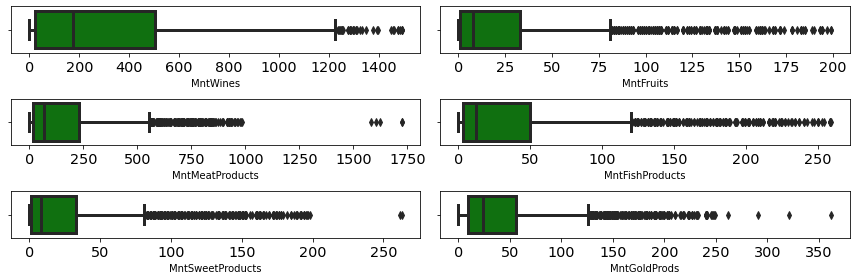

In [15]:
for i in range (0, len(amount_spent)) :
    plt.subplot(3,2, i+1)
    sns.boxplot(x=df[amount_spent[i]], color='green')
    plt.tight_layout()

Terlihat bahwa himpunan kolom `amount_spent` memiliki banyak outliers, namun hal ini masih wajar. Karena setiap kostumer pasti pernah memborong produk kami sehingga uang yang dikeluarkannya juga besar.

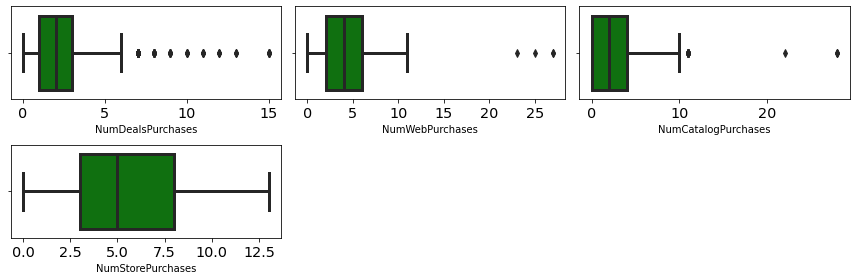

In [16]:
for i in range (0, len(num_purchase)) :
    plt.subplot(2,3, i+1)
    sns.boxplot(x=df[num_purchase[i]], color='green')
    plt.tight_layout()

Terlihat untuk himpunan kolom `num_purchase`, semua kolom memiliki outliers kecuali kolom `'NumStorePurchases'`, namun hal ini masih wajar karena Customer ada juga yang memiliki media belanja favoritnya.

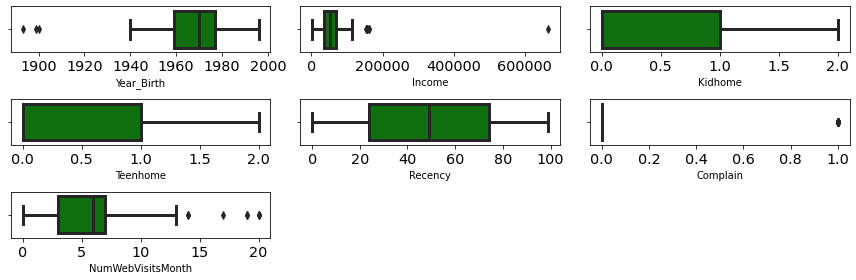

In [17]:
for i in range (0, len(others)) :
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[others[i]], color='green')
    plt.tight_layout()

Dari hasil di atas dapat disimpulkan bahwa :
1. Terlihat kolom `'Year_Birth'`,`'Income'` memiliki outlier yang sangat jauh, maka harus dibuang nilai outliernya.<br>
2. Kolom `Year_Birth` perlu dipecah ke bentuk `Age`<br>
3. Kolom `AcceptedCmp%` perlu dicoba untuk dijumlahkan<br>
4. Kolom `Mnt%` perlu dicoba untuk dijumlahkan<br>

Sebelum kita melanjutkan proses EDA ini, kita perlu melakukan beberapa proses `Data Cleansing Awal` berupa :
1. Handling Missing Value;
2. Handling Outlier; dan
3. Membuat kolom baru yang dibutuhkan.

### ***B. Data Cleansing Awal.***

#### 1). Handling Missing Value

In [18]:
# Membuat dataset baru untuk melakukan data cleansing
dfa = df.copy()

In [19]:
# Mengisi Missing Value dengan Median
dfa['Income'] = dfa['Income'].fillna(dfa['Income'].median())

# Memastikan bahwa missing value sudah tidak ada
dfa.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### 2). Handling Outlier

In [20]:
# Menghapus nilai outlier.
from scipy import stats
outliers = ['Year_Birth', 'Income']

for i in outliers :
    print(f'Jumlah baris sebelum memfilter outlier {i}: {len(dfa)}')
    
    Q1 = dfa[i].quantile(0.25)
    Q3 = dfa[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    
    dfa = dfa[(dfa[i] >= low_limit) &
            (dfa[i] <= high_limit)
            ]
    
    print(f'Jumlah baris setelah memfilter outlier pada kolom {i}: {len(dfa)}')

Jumlah baris sebelum memfilter outlier Year_Birth: 2240
Jumlah baris setelah memfilter outlier pada kolom Year_Birth: 2237
Jumlah baris sebelum memfilter outlier Income: 2237
Jumlah baris setelah memfilter outlier pada kolom Income: 2229


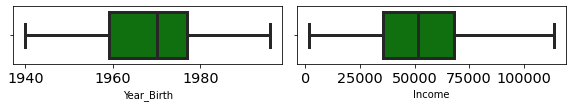

In [21]:
# Memastikan kembali bahwa kolom Year_Birth dan Income sudah tidak ada outlier
for i in range (0, len(outliers)) :
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=dfa[outliers[i]], color='green')
    plt.tight_layout()

#### 3). Membuat Kolom Baru

In [22]:
# Age
dfa['Age'] = 2020 - dfa['Year_Birth']

# amount spent/ spending
dfa['Total_amount_spent'] = dfa['MntFruits']+dfa['MntMeatProducts']+dfa['MntFishProducts']+dfa['MntSweetProducts']+dfa['MntGoldProds']

# total accept campaign
dfa['Total_accept_campaign'] = dfa['AcceptedCmp1']+dfa['AcceptedCmp2']+dfa['AcceptedCmp3']+dfa['AcceptedCmp4']+dfa['AcceptedCmp5']

In [23]:
# Memindahkan value pada kolom Marital_Status
dfa['Marital_Status'] = dfa['Marital_Status'].replace(['Alone', 'YOLO'], 'Single')
dfa['Marital_Status'] = dfa['Marital_Status'].replace(['Absurd'], 'Together')
dfa['Marital_Status'] = dfa['Marital_Status'].replace(['Widow'], 'Divorced')

# Memindahkan value pada kolom Education
dfa['Education'] = dfa['Education'].replace(['2n Cycle'], 'Master')

In [24]:
# pengelompokan ulang kolom berdasarkan jenisnya

cats = ['Education', 'Marital_Status']
nums = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Age','Total_amount_spent', 'Total_accept_campaign']
timestamp = ['Dt_Customer']


# pengelompokkan lebih spesifik untuk 'nums'

amount_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
others1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']
others2 = ['Complain', 'NumWebVisitsMonth', 'Age', 'Total_amount_spent', 'Total_accept_campaign']

## ***C. Melihat Distribusi Data.***

### ***1). Numerical***

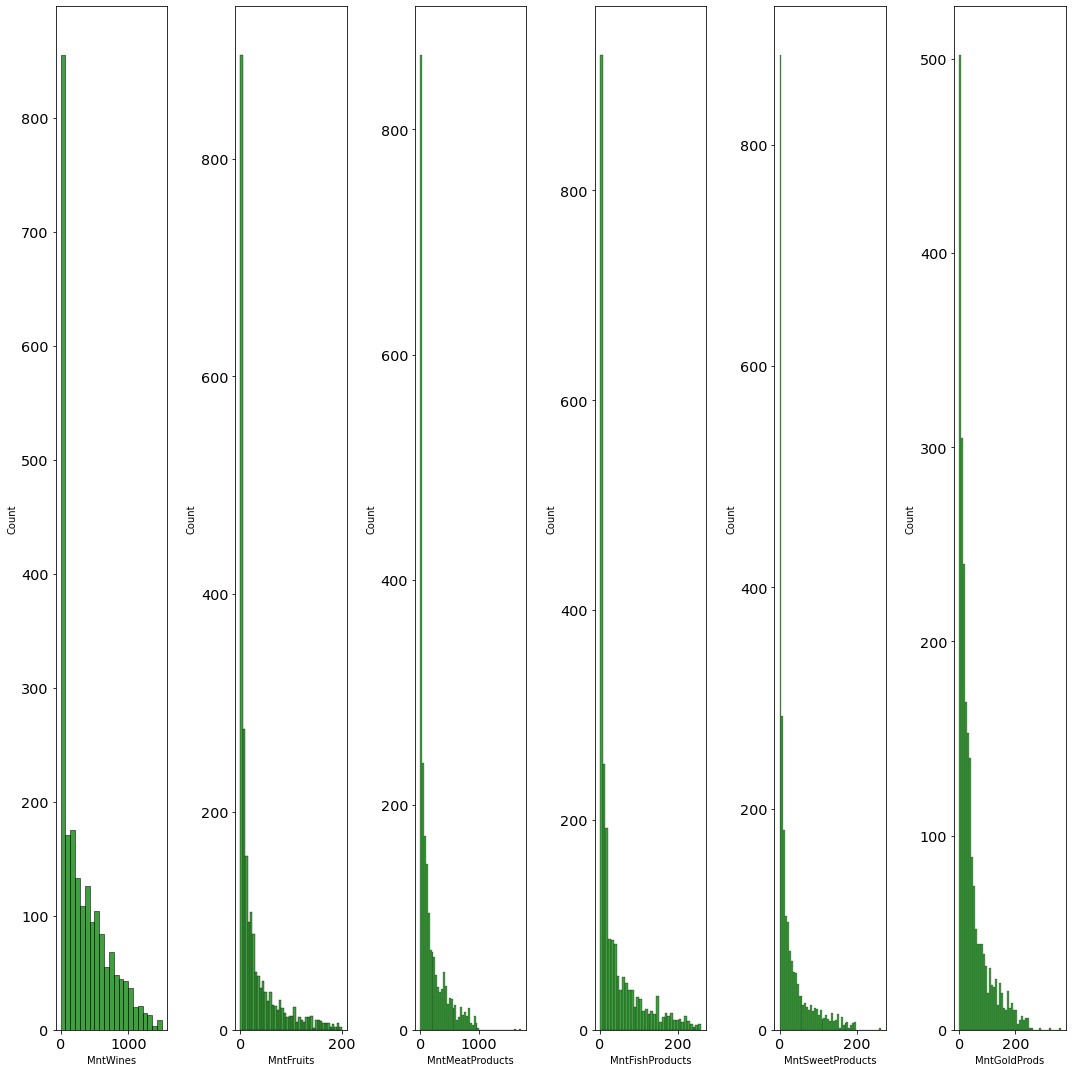

In [25]:
plt.figure(figsize=(15, 15))
for i in range(0, len(amount_spent)):
    plt.subplot(1, len(amount_spent), i+1)
    sns.histplot(dfa[amount_spent[i]], color='green')
    plt.tight_layout()

Terlihat bahwa himpunan kolom `amount_spent` memiliki data yang terdistribusi secara skewed.

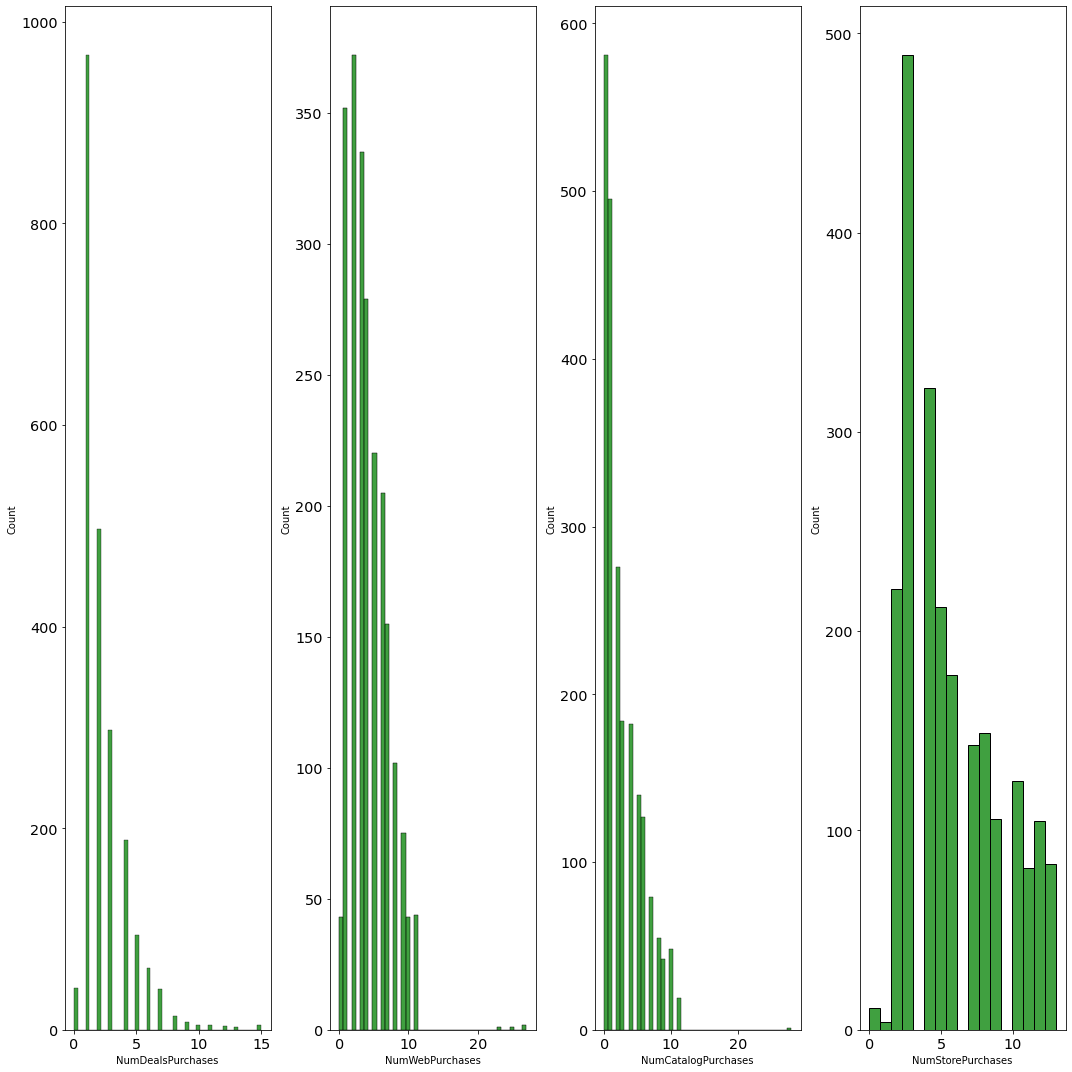

In [26]:
plt.figure(figsize=(15, 15))
for i in range(0, len(num_purchases)):
    plt.subplot(1, len(num_purchases), i+1)
    sns.histplot(dfa[num_purchases[i]], color='green')
    plt.tight_layout()

Terlihat bahwa himpunan kolom `num_purchases` memiliki data yang terdistribusi secara skewed.

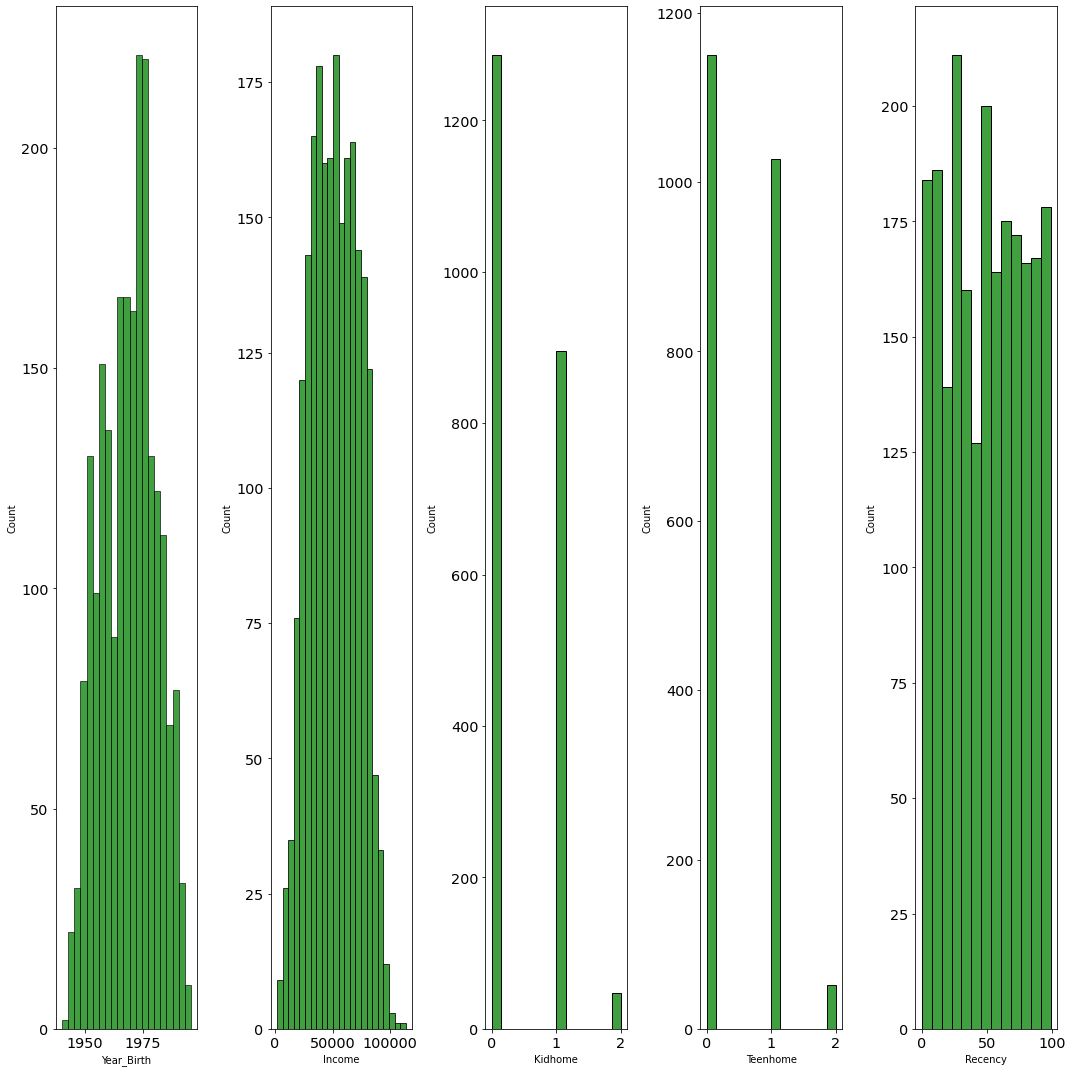

In [27]:
plt.figure(figsize=(15, 15))
for i in range(0, len(others1)):
    plt.subplot(1, len(others1), i+1)
    sns.histplot(dfa[others1[i]], color='green')
    plt.tight_layout()

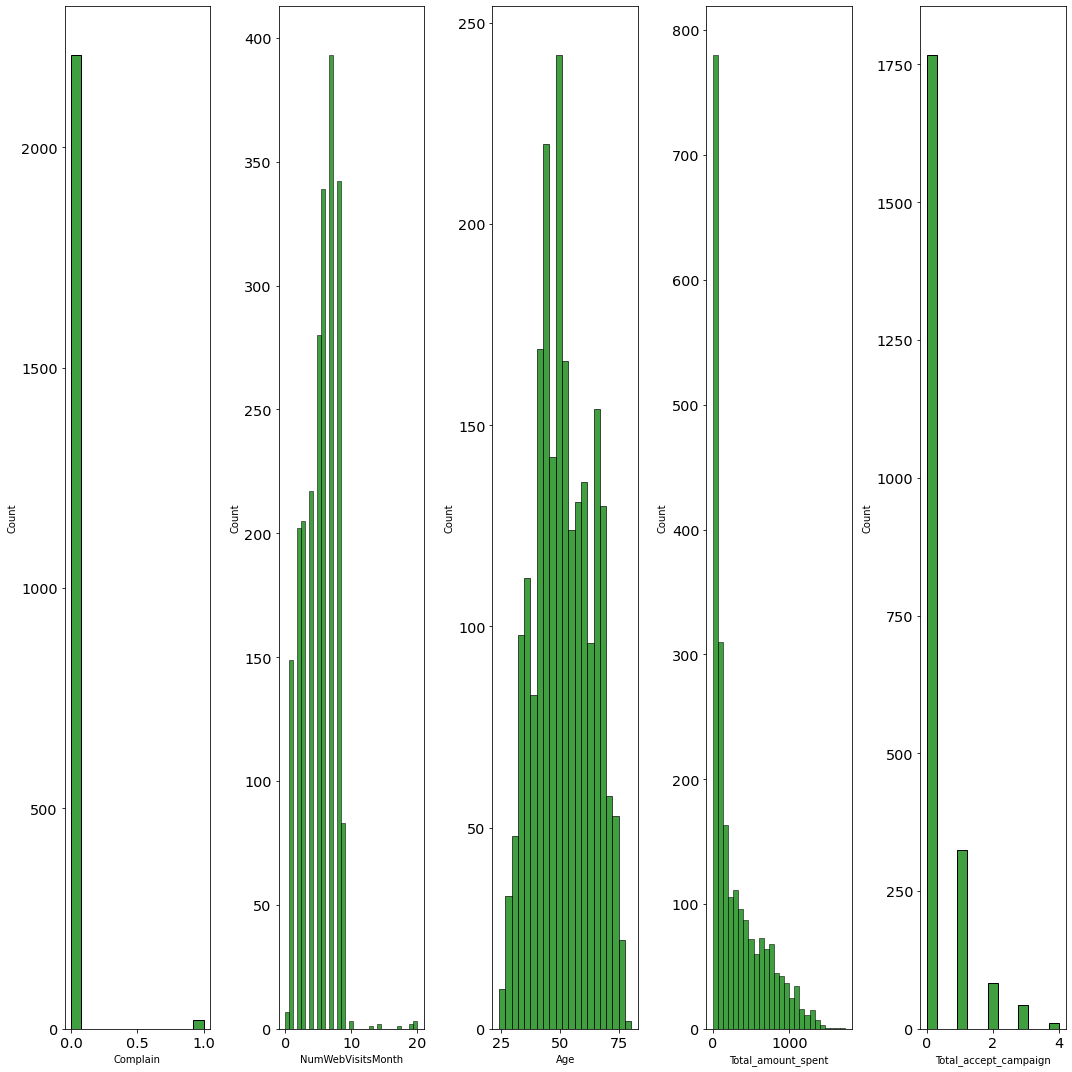

In [28]:
plt.figure(figsize=(15, 15))
for i in range(0, len(others2)):
    plt.subplot(1, len(others2), i+1)
    sns.histplot(dfa[others2[i]], color='green')
    plt.tight_layout()

Dari grafik di atas dapat disimpulkan bahwa :
1. Kolom dengan tipe normal distribution `['Year_birth', 'Income', 'Recency', 'NumStorePurchases', dan 'Age']`; dan<br>
2. Kolom dengan tipe distribusi skewed `['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Total_amount_spent', dan 'Total_accept_campaign']`.<br>

### ***2). Categorical***

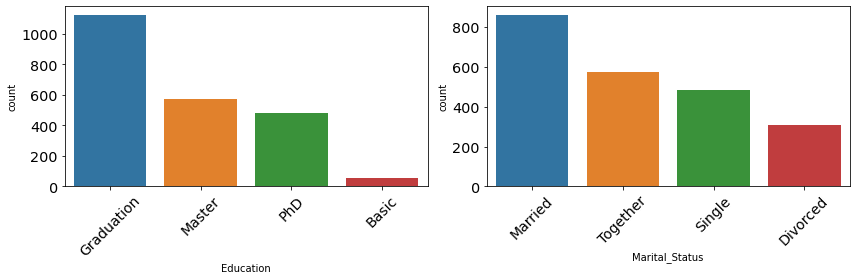

In [29]:
for i in range (0, len(cats)) :
    plt.subplot(1, 2, i+1)
    sns.countplot(x = dfa[cats[i]],data = dfa,order = dfa[cats[i]].value_counts().index)
    plt.xticks(fontsize = 14, rotation = 45)
    plt.tight_layout()

Dari grafik di atas dapat disimpulkan bahwa :
1. Persebaran terbesar dari segi pendidikan adalah 'Graduation' dan yang terendah adalah 'Basic'; dan<br>
2. Persebaran terbesar dari segi perkawinan adalah 'Married' dan yang terendah adalah 'Divorced'.<br>
    

***Yang harus difollow up saat melakukan Data Pre-Processing adalah :***
1. Membuang kolom yang tidak akan dipakai, karena agar model belajar dengan baik kita harus membuat dataset kita 'Lengkap' tanpa kelebihan feature;
2. Mengecek data duplikat;
3. Melakukan feature transformation dan feature encoding seperlunya.

## ***3. Multivariate Analysis***

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

### A. Korelasi

In [30]:
# Melihat korelasi keseluruhan
numerik = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response','Age','Total_amount_spent', 'Total_accept_campaign']
dfa[numerik].corr()

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth               1.000000 -0.211432  0.234469 -0.364148 -0.017956   
Income                  -0.211432  1.000000 -0.527402  0.042208  0.006638   
Kidhome                  0.234469 -0.527402  1.000000 -0.036461  0.009144   
Teenhome                -0.364148  0.042208 -0.036461  1.000000  0.016246   
Recency                 -0.017956  0.006638  0.009144  0.016246  1.000000   
MntWines                -0.162628  0.728169 -0.498230  0.003899  0.016797   
MntFruits               -0.013360  0.535305 -0.373563 -0.177128 -0.003376   
MntMeatProducts         -0.038417  0.693762 -0.443248 -0.267046  0.026651   
MntFishProducts         -0.042064  0.550047 -0.388645 -0.205301  0.001694   
MntSweetProducts        -0.018938  0.549804 -0.371720 -0.163651  0.023071   
MntGoldProds            -0.056934  0.412553 -0.351059 -0.021478  0.017559   
NumDealsPurchases       -0.074089 -0.131085  0.231266  0.395713 -0.002780   
NumWebPurchases         -0.153410  0.493610 -0.365123  0.154624 -0.010256   
NumCatalogPurchases     -0.140002  0.706885 -0.517305 -0.111976  0.030805   
NumStorePurchases       -0.138852  0.683460 -0.504817  0.048310  0.001671   
NumWebVisitsMonth        0.119885 -0.644405  0.448826  0.133056 -0.020849   
AcceptedCmp1            -0.007949  0.342864 -0.172910 -0.140964 -0.019317   
AcceptedCmp2            -0.007538  0.110216 -0.081971 -0.015885 -0.001774   
AcceptedCmp3             0.061412 -0.011141  0.014500 -0.043369 -0.033067   
AcceptedCmp4            -0.064121  0.231206 -0.162170  0.038374  0.018916   
AcceptedCmp5             0.015654  0.415038 -0.205456 -0.191018  0.000942   
Complain                -0.004380 -0.027474  0.036294  0.007442  0.005404   
Response                 0.018918  0.174557 -0.080514 -0.155726 -0.199078   
Age                     -1.000000  0.211432 -0.234469  0.364148  0.017956   
Total_amount_spent      -0.044848  0.740418 -0.499034 -0.253212  0.022929   
Total_accept_campaign    0.000513  0.386638 -0.212243 -0.128430 -0.012271   

                       MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth            -0.162628  -0.013360        -0.038417        -0.042064   
Income                 0.728169   0.535305         0.693762         0.550047   
Kidhome               -0.498230  -0.373563        -0.443248        -0.388645   
Teenhome               0.003899  -0.177128        -0.267046        -0.205301   
Recency                0.016797  -0.003376         0.026651         0.001694   
MntWines               1.000000   0.387591         0.586156         0.398024   
MntFruits              0.387591   1.000000         0.562744         0.593941   
MntMeatProducts        0.586156   0.562744         1.000000         0.589813   
MntFishProducts        0.398024   0.593941         0.589813         1.000000   
MntSweetProducts       0.384885   0.566545         0.544347         0.578983   
MntGoldProds           0.384979   0.389145         0.366044         0.421147   
NumDealsPurchases      0.013908  -0.133856        -0.165686        -0.141021   
NumWebPurchases        0.540786   0.295507         0.315014         0.291781   
NumCatalogPurchases    0.673390   0.515184         0.703668         0.564718   
NumStorePurchases      0.641490   0.462344         0.509984         0.459031   
NumWebVisitsMonth     -0.327949  -0.424034        -0.543223        -0.452835   
AcceptedCmp1           0.354069   0.195001         0.321606         0.260545   
AcceptedCmp2           0.205955  -0.009936         0.045283         0.002330   
AcceptedCmp3           0.061456   0.014442         0.020987        -0.000243   
AcceptedCmp4           0.373206   0.009850         0.108349         0.016257   
AcceptedCmp5           0.471790   0.211630         0.385770         0.197715   
Complain              -0.036257  -0.002988        -0.020647        -0.019039   
Response               0.246534   0.125192         0.247103         0.110609   
Age                    

<AxesSubplot:>

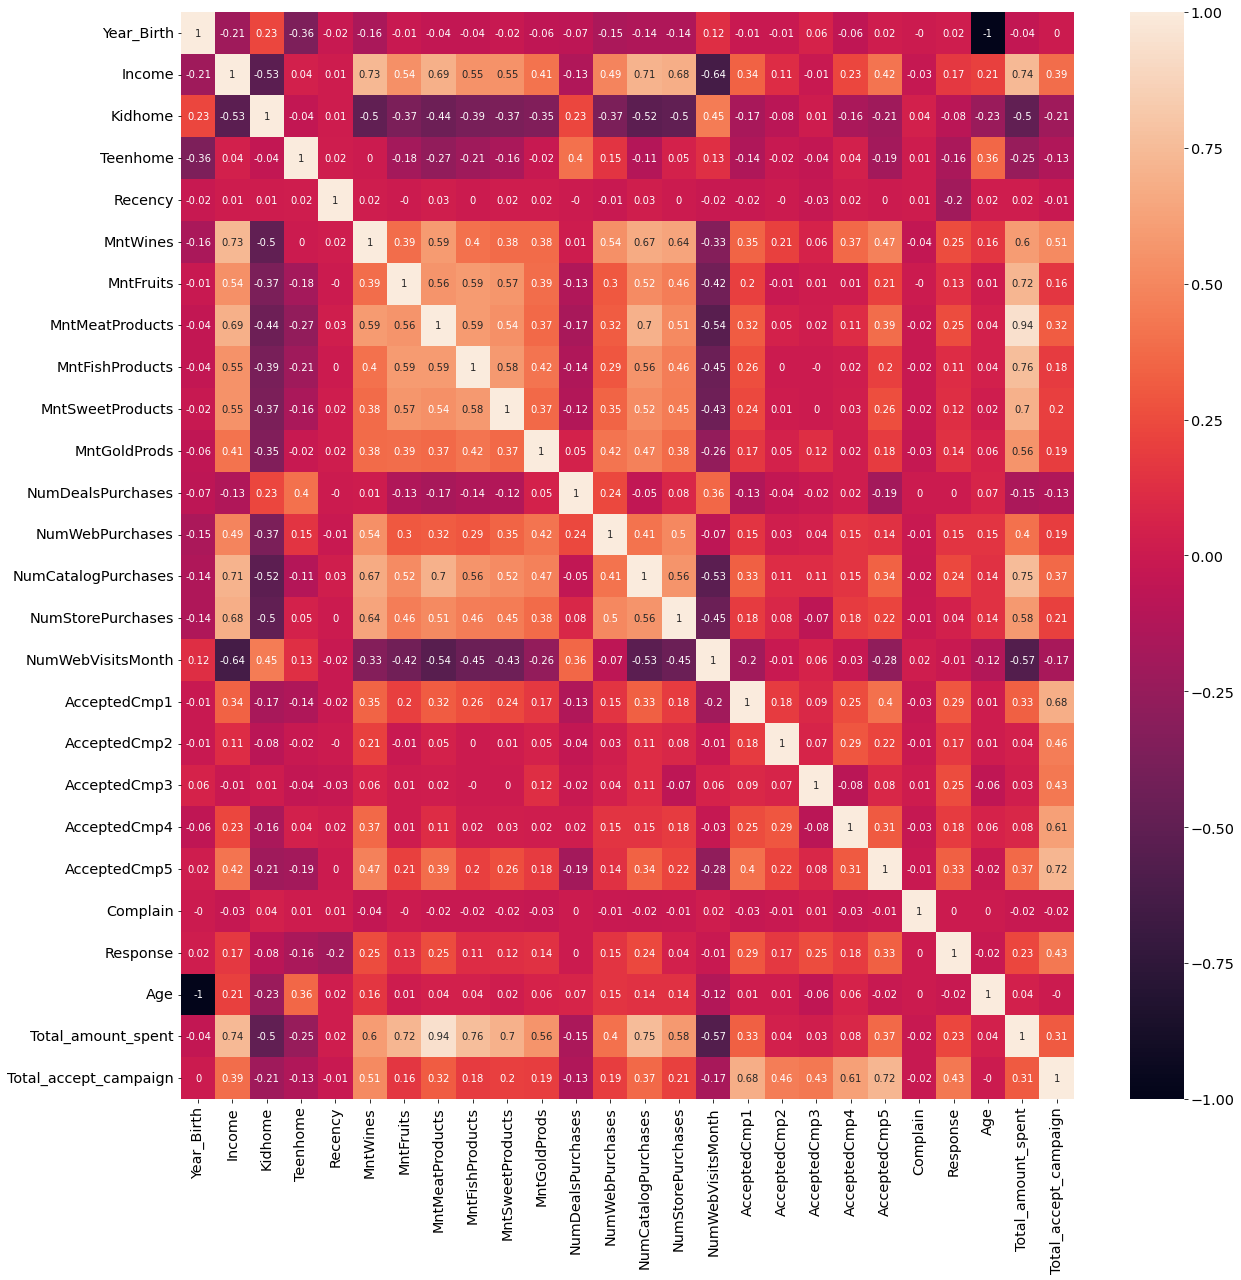

In [31]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(round(dfa[numerik].corr(), 2), annot = True)

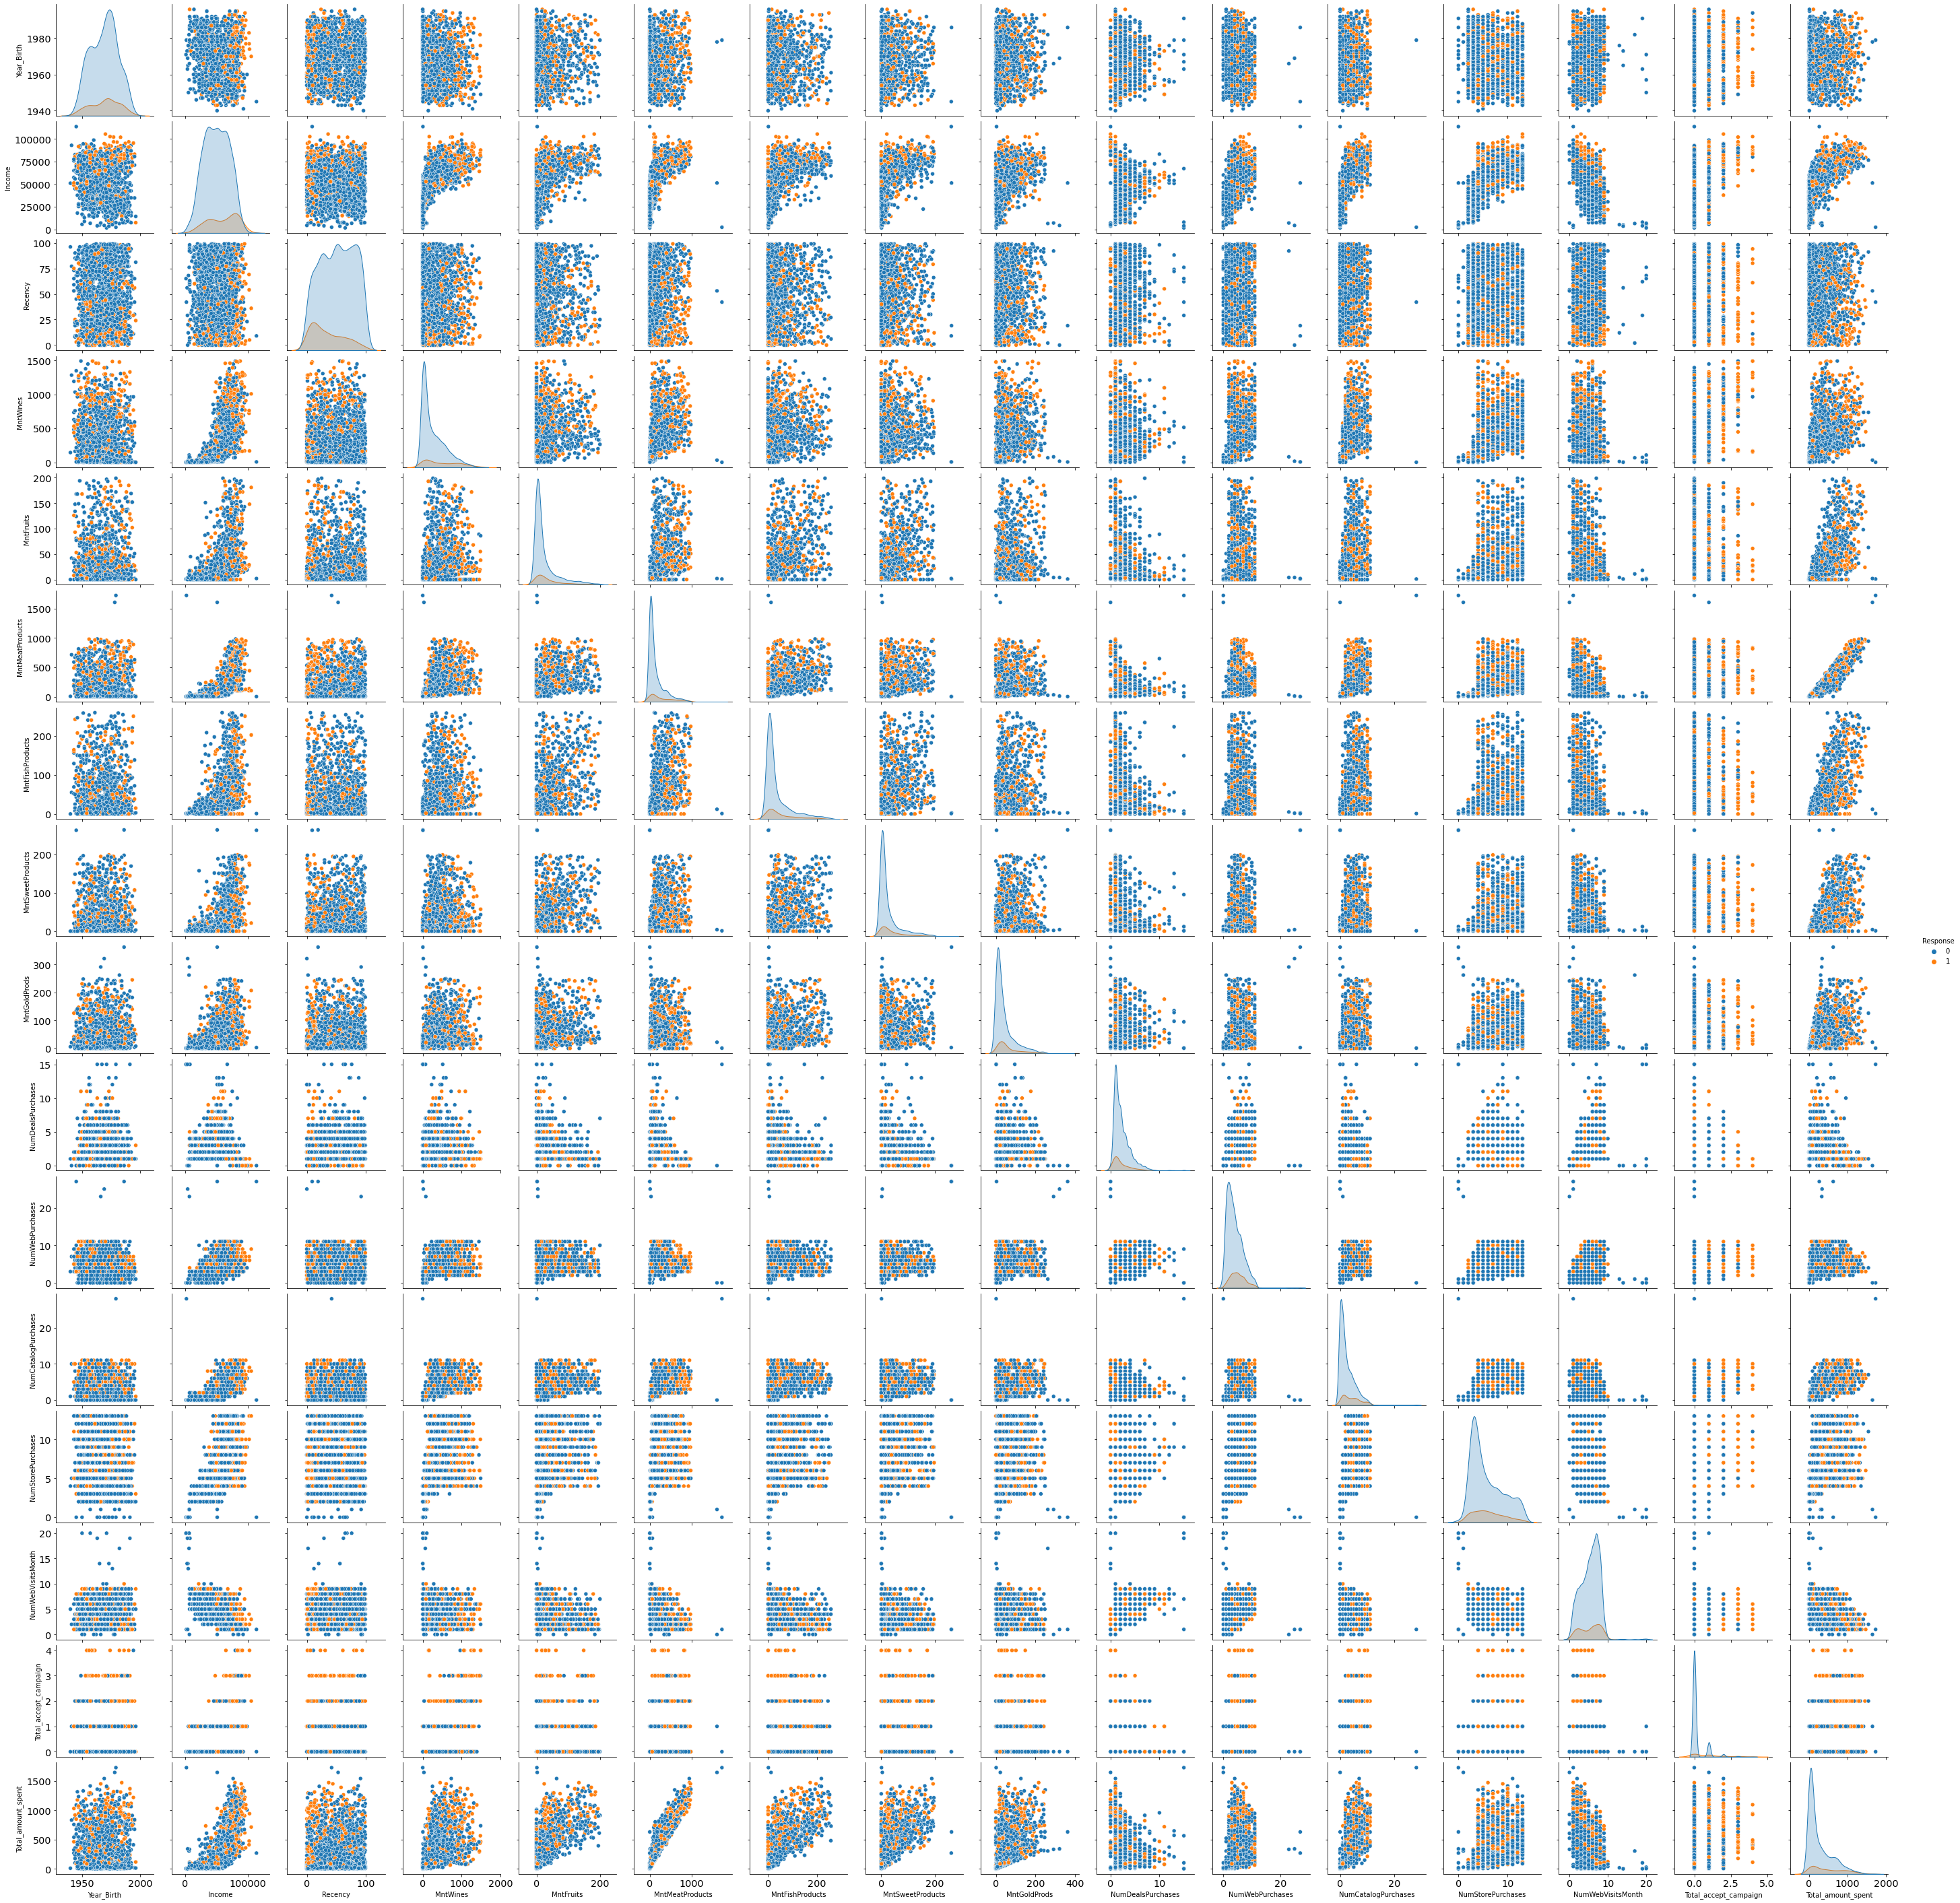

In [32]:
sns.pairplot(dfa[['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Total_accept_campaign', 'Total_amount_spent']], hue = 'Response')

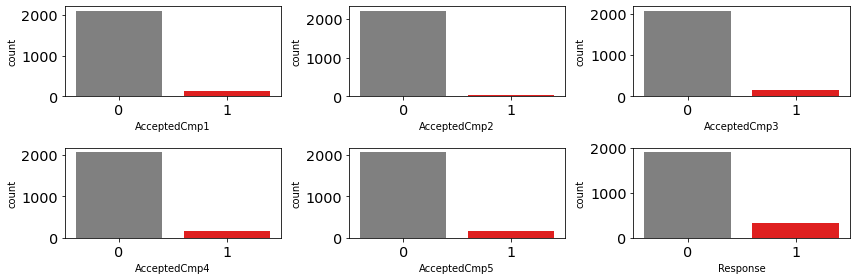

In [34]:
feature = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age','Total_amount_spent', 'Total_accept_campaign']
for i in feature :
    plt.figure(figsize = (4, 6))
    sns.barplot(y = dfa[i], x = 'Response', data = dfa, palette=["grey", "red"])
    plt.show()

#### 1) Korelasi Feature dan Label

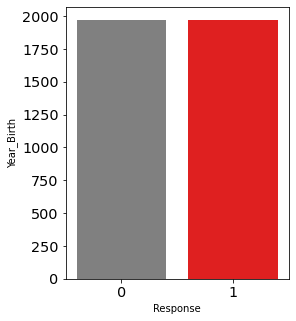

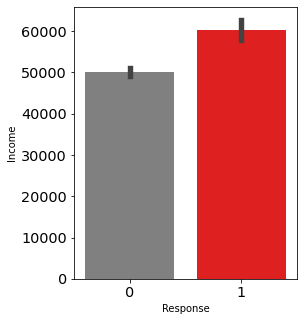

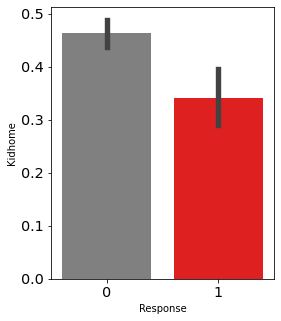

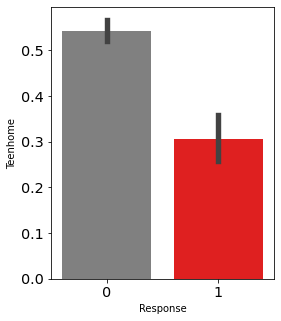

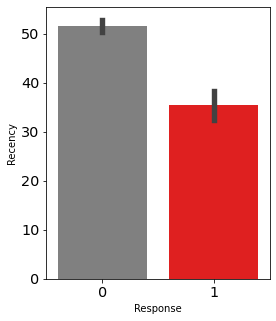

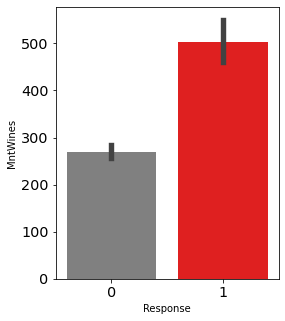

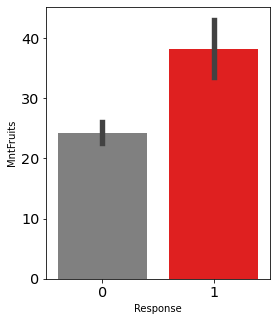

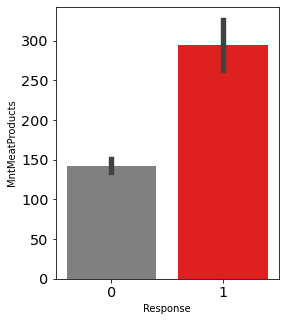

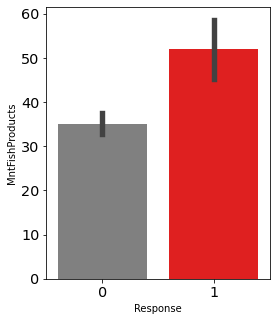

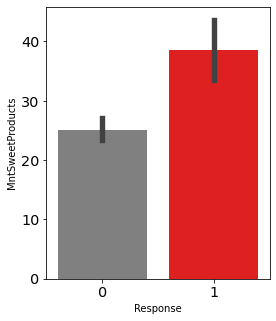

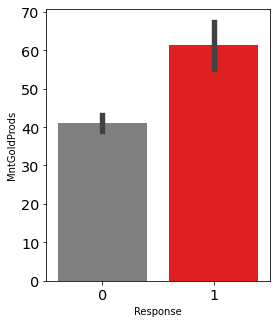

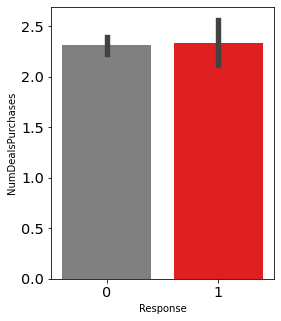

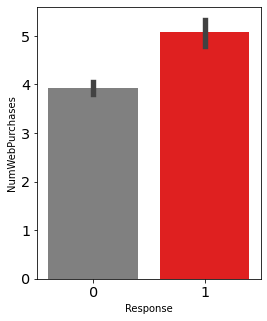

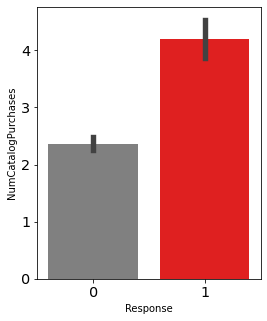

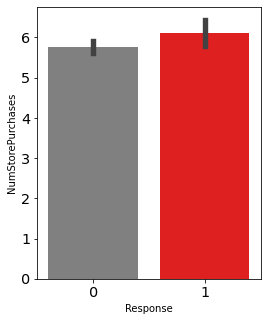

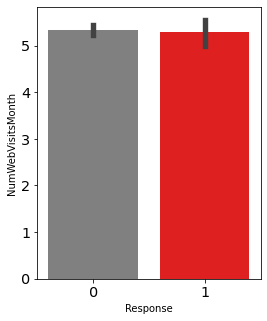

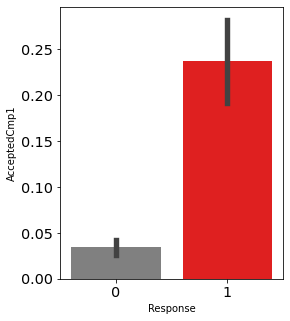

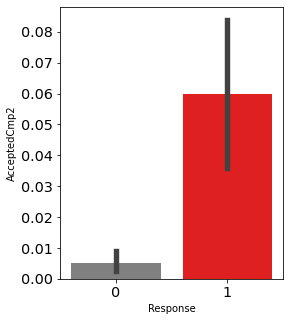

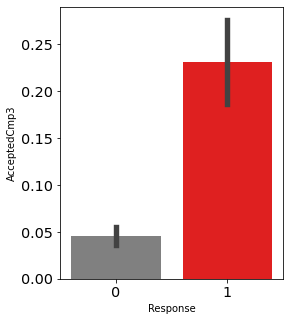

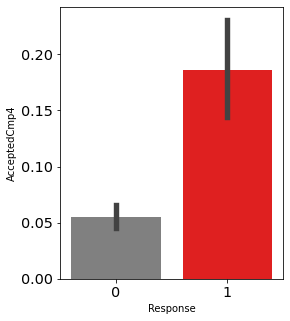

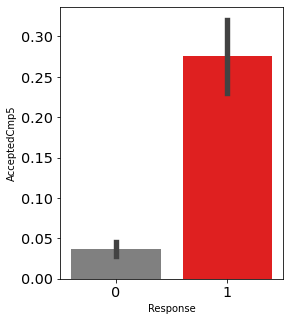

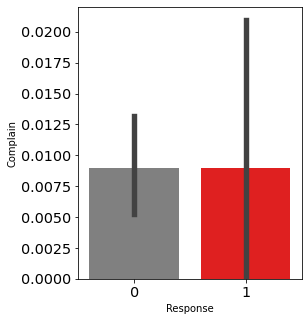

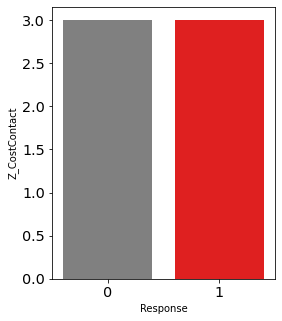

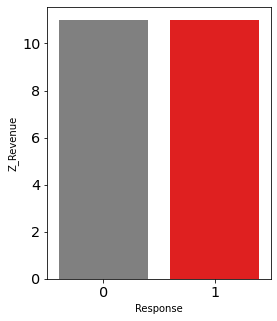

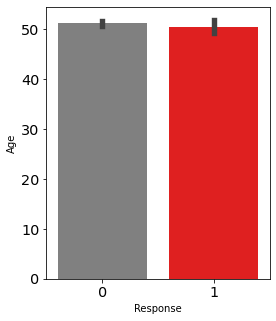

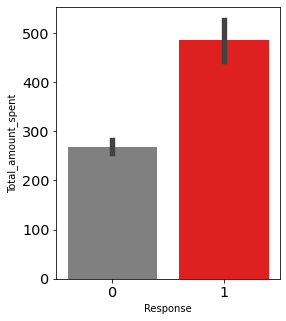

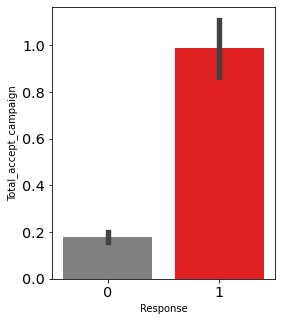

In [35]:
feature = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age','Total_amount_spent', 'Total_accept_campaign']
for i in feature :
    plt.figure(figsize = (4, 5))
    sns.barplot(y = dfa[i], x = 'Response', data = dfa, palette=["grey", "red"])
    plt.show()

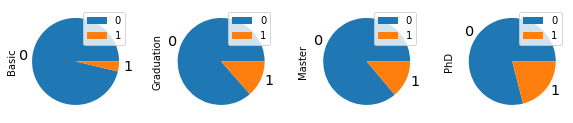

In [46]:
pd.crosstab(dfa['Response'], dfa['Education']).plot(kind = 'pie', subplots = True, figsize = (10, 2))
plt.show()

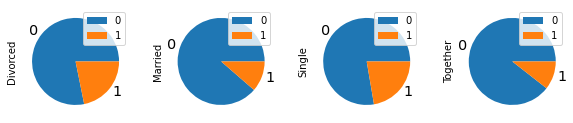

In [47]:
pd.crosstab(dfa['Response'], dfa['Marital_Status']).plot(kind = 'pie', subplots = True, figsize = (10, 2))
plt.show()

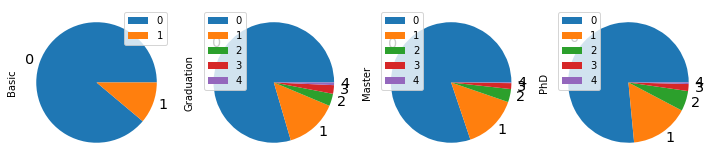

In [48]:
#Banyaknya campaign perusahaan yg diikuti oleh customer berdasarkan Education
pd.crosstab(dfa['Total_accept_campaign'], dfa['Education']).plot(kind = 'pie', subplots = True, figsize = (10, 40))
plt.tight_layout()

<AxesSubplot:xlabel='Income', ylabel='Count'>

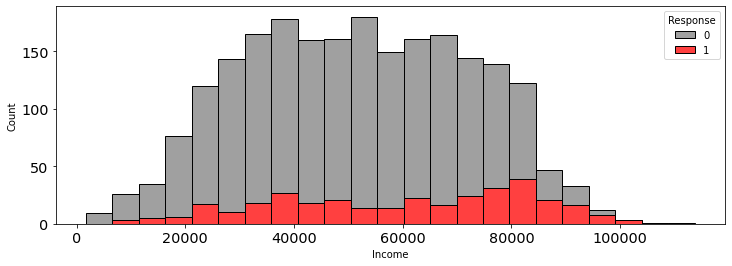

In [39]:
sns.histplot(x = dfa['Income'], hue = dfa['Response'], multiple = 'stack', palette=["grey", "red"])

**SUMMARY MULTIVARIATE ANALYSIS**

Pada `heatmap` kita tinjau bahwa ada beberapa variabel yg berkolerasi cukup kuat. contohnya kolom `'Total_accept_campaign'` dengan `'Response'`
<br>

Bahkan, ada beberapa variabel yang memiliki kolerasi > 0.7 yang nantinya akan dipertimbangkan untuk dihapus pada tahap pre-processing

## ***4. Business Insight***

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

Setelah melakukan analisis diatas dapat ditarik beberapa insight
<br>

BUSINESS INSIGHT :
- Customer dengan Recency rendah memiki kecenderungan untuk accept compaign lebih tinggi
- Customer dengan Total_amount_spent yang tinggi memiki kecenderungan untuk accept compaign lebih tinggi
- Customer yang memiliki anak cenderung untuk reject compaign
<br>

BUSINESS RECOMMENDATION :
- Kita perlu fokus customer dengan Recency rendah untuk ditargetkan pada campaign selanjutnya
- Menargetkan customer dengan Total_amount_spent yang tinggi pada campaign selanjutnya
- Menargetkan customer yang belum memiliki anak pada campaign selanjutnya